# Pylops - freq domain phase shift

### Author: M.Ravasi

In this notebook I will show how to use the `Shift` operator.

In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

#import warnings
#warnings.filterwarnings('ignore')

import numpy as np
import matplotlib.pyplot as plt
import scipy as sp

import pylops

from scipy.sparse import csr_matrix, vstack, rand
from scipy.linalg import lstsq, solve, pinv
from scipy.sparse.linalg import LinearOperator as spLinearOperator
from scipy.sparse.linalg import cg, lsqr

from pylops.utils import dottest
from pylops.utils.wavelets import *
from pylops.basicoperators import *
from pylops.signalprocessing import *
from visual import explode_volume

## 1d

In [2]:
nt = 127
dt = 0.004
t = np.arange(nt) * dt
ntwav = 41
nfft = 127

wav = ricker(t[:ntwav], f0=20)[0]
wav = np.pad(wav, [0, nt-len(wav)])
WAV = np.fft.rfft(wav, n=nfft)

f = np.fft.rfftfreq(nfft, dt)
itshift = 8
shift = np.exp(-1j*2*np.pi*f*itshift*dt)

WAVshift = WAV * shift
wavshift = np.fft.irfft(WAVshift, n=nfft)[:nt]

/var/folders/pc/wf4mhn4n2cv8wjt_jtj8t8qhsljrkk/T/ipykernel_9848/1228655856.py:2: DeprecationWarning: `np.complex` is a deprecated alias for the builtin `complex`. To silence this warning, use `complex` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.complex128` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  Sop = Diagonal(np.exp(-1j*2*np.pi*FFTop.f*itshift*dt), dtype=np.complex)


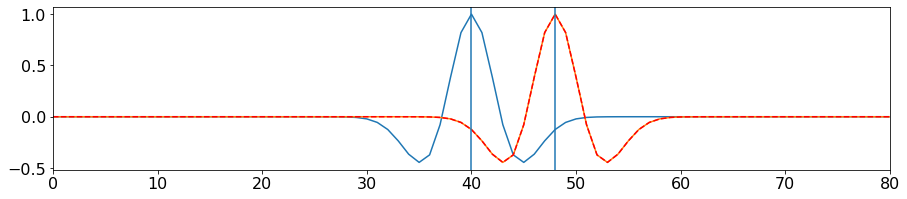

In [3]:
FFTop = FFT(nt, sampling=dt, real=True)
Sop = Diagonal(np.exp(-1j*2*np.pi*FFTop.f*itshift*dt), dtype=np.complex)
Op = FFTop.H * Sop * FFTop
wavshift1 = Op * wav

plt.figure(figsize=(15, 3))
plt.plot(wav)
plt.plot(wavshift)
plt.plot(wavshift1, '--r')
plt.axvline(ntwav-1)
plt.axvline(ntwav-1+itshift)
plt.xlim(0, 80);

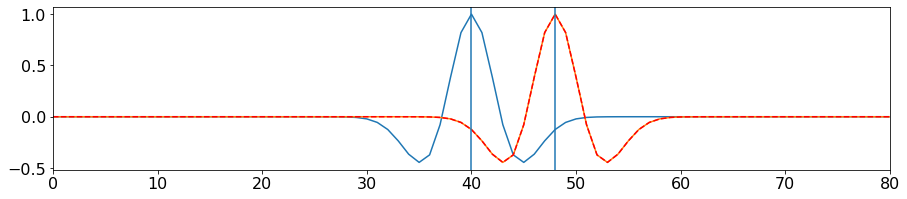

In [4]:
Op = Shift(nt, dt*itshift, sampling=dt, real=True, dtype=np.float64)
wavshift1 = Op * wav

plt.figure(figsize=(15, 3))
plt.plot(wav)
plt.plot(wavshift)
plt.plot(wavshift1, '--r')
plt.axvline(ntwav-1)
plt.axvline(ntwav-1+itshift)
plt.xlim(0, 80);

## 2d with single shift

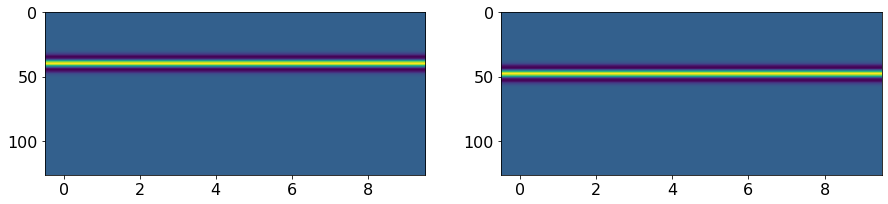

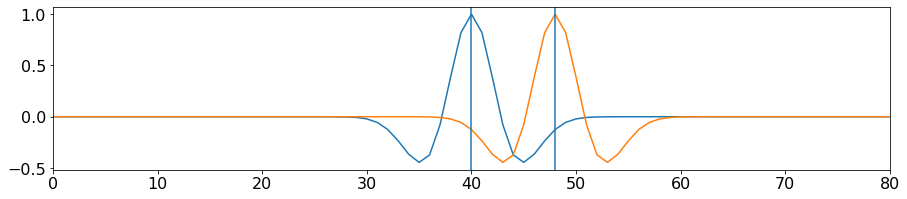

In [5]:
wav2d = np.outer(wav, np.ones(10))

Op = Shift((nt, 10), dt*itshift, axis=0, sampling=dt, real=True, dtype=np.float64)
wav2dshift = (Op * wav2d.ravel()).reshape(nt, 10)

fig, axs = plt.subplots(1, 2, figsize=(15, 3))
axs[0].imshow(wav2d)
axs[0].axis('tight')
axs[1].imshow(wav2dshift)
axs[1].axis('tight')

plt.figure(figsize=(15, 3))
plt.plot(wav2d[:, 5])
plt.plot(wav2dshift[:, 5])
plt.axvline(ntwav-1)
plt.axvline(ntwav-1+itshift)
plt.xlim(0, 80);

Dot test passed, v^H(Opu)=32.05137226931708 - u^H(Op^Hv)=32.051372269317056


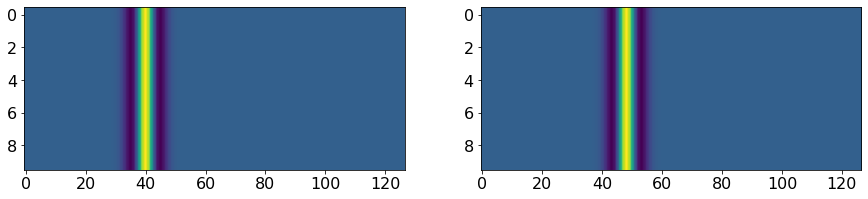

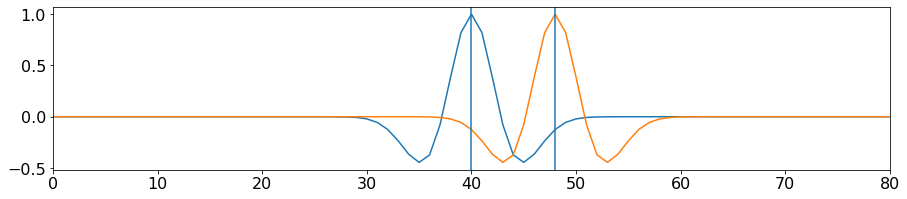

In [6]:
wav2d = np.outer(wav, np.ones(10)).T

Op = Shift((10, nt), dt*itshift, axis=1, sampling=dt, real=True, dtype=np.float64)
wav2dshift = (Op * wav2d.ravel()).reshape(10, nt)
dottest(Op, complexflag=0, verb=True)

fig, axs = plt.subplots(1, 2, figsize=(15, 3))
axs[0].imshow(wav2d)
axs[0].axis('tight')
axs[1].imshow(wav2dshift)
axs[1].axis('tight')

plt.figure(figsize=(15, 3))
plt.plot(wav2d[5])
plt.plot(wav2dshift[5])
plt.axvline(ntwav-1)
plt.axvline(ntwav-1+itshift)
plt.xlim(0, 80);

## 2d with trace dependent shift

Dot test passed, v^H(Opu)=-58.86890462292895 - u^H(Op^Hv)=-58.868904622929016


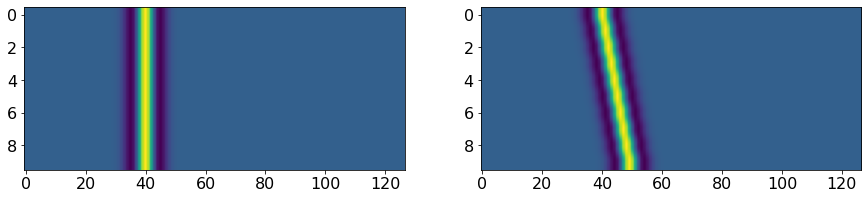

In [7]:
wav2d = np.outer(wav, np.ones(10)).T

shift = dt*np.arange(10)
Op = Shift((10, nt), shift, axis=1, sampling=dt, real=True, dtype=np.float64)
wav2dshift = (Op * wav2d.ravel()).reshape(10, nt)
dottest(Op, complexflag=0, verb=True)

fig, axs = plt.subplots(1, 2, figsize=(15, 3))
axs[0].imshow(wav2d)
axs[0].axis('tight')
axs[1].imshow(wav2dshift)
axs[1].axis('tight');

Dot test passed, v^H(Opu)=-47.148690775671355 - u^H(Op^Hv)=-47.14869077567137


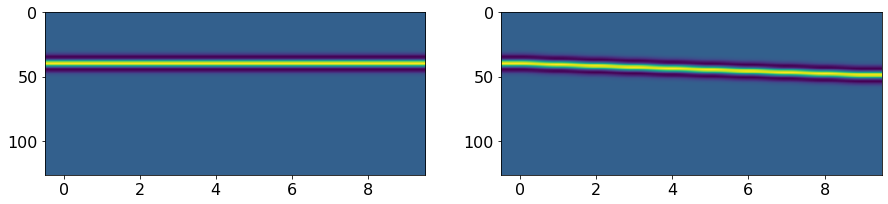

In [8]:
wav2d = np.outer(wav, np.ones(10))

shift = dt*np.arange(10)
Op = Shift((nt, 10), shift, axis=0, sampling=dt, real=True, dtype=np.float64)
wav2dshift = (Op * wav2d.ravel()).reshape(nt, 10)
dottest(Op, complexflag=0, verb=True)

fig, axs = plt.subplots(1, 2, figsize=(15, 3))
axs[0].imshow(wav2d)
axs[0].axis('tight')
axs[1].imshow(wav2dshift)
axs[1].axis('tight');

## 3d with single shift

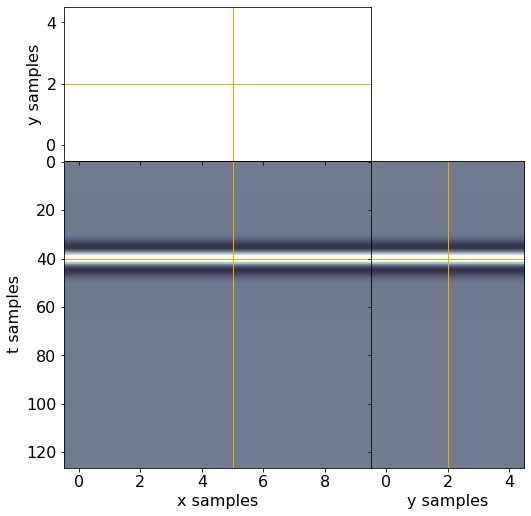

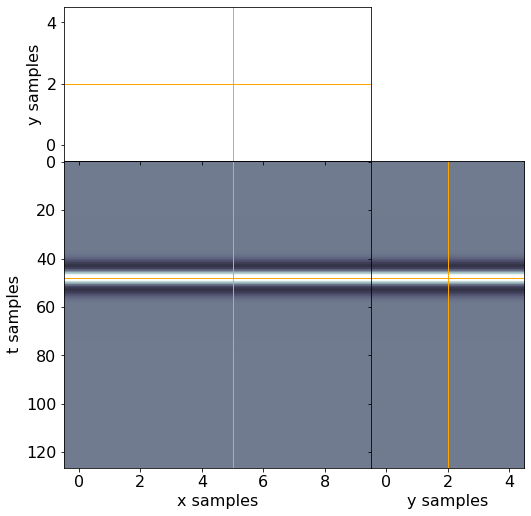

In [9]:
wav3d = np.outer(wav, np.ones(50)).reshape(nt, 10, 5)

Op = Shift((nt, 10, 5), dt*itshift, axis=0, sampling=dt, real=True, dtype=np.float64)
wav3dshift = (Op * wav3d.ravel()).reshape(nt, 10, 5)


explode_volume(wav3d, t=40)
explode_volume(wav3dshift, t=48)

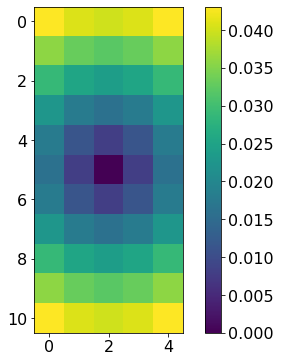

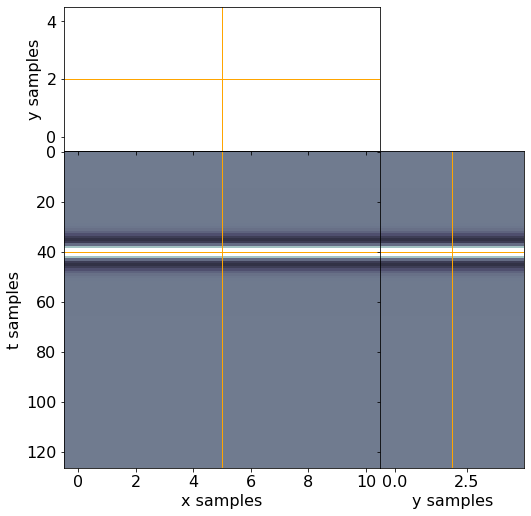

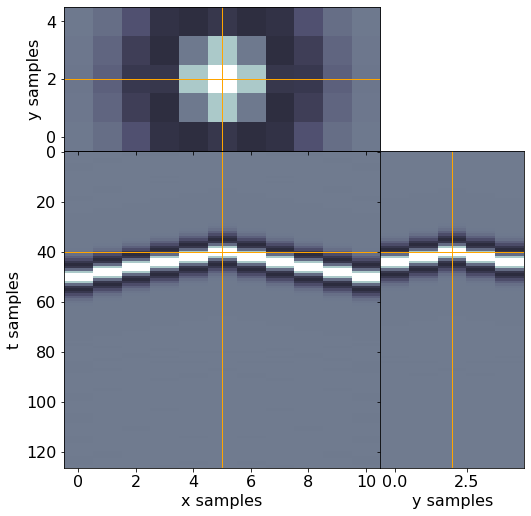

In [10]:
wav3d = np.outer(wav, np.ones(55)).reshape(nt, 11, 5)

x, y = np.meshgrid(np.arange(11)-5, np.arange(5)-2, indexing='ij')
shift = dt * np.sqrt(x**2+y**2) * 2
Op = Shift((nt, 11, 5), shift, axis=0, sampling=dt, real=True, dtype=np.float64)
wav3dshift = (Op * wav3d.ravel()).reshape(nt, 11, 5)

plt.figure()
plt.imshow(shift)
plt.colorbar()
explode_volume(wav3d, t=40, x=5, y=2, interp='none')
explode_volume(wav3dshift, t=40, x=5, y=2, interp='none')

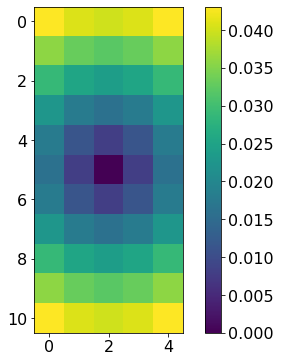

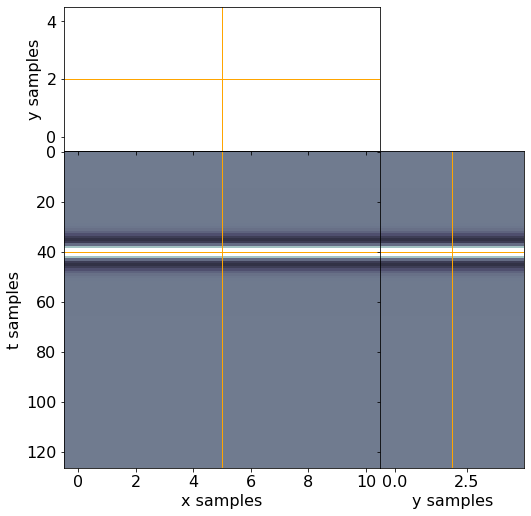

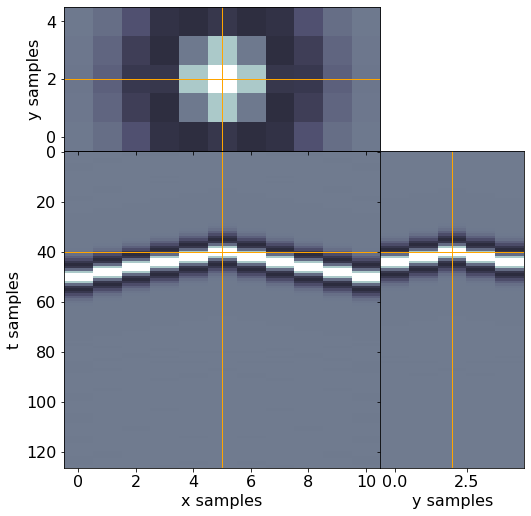

In [11]:
wav3d = np.outer(wav, np.ones(55)).reshape(nt, 11, 5).transpose(1, 2, 0)

x, y = np.meshgrid(np.arange(11)-5, np.arange(5)-2, indexing='ij')
shift = dt * np.sqrt(x**2+y**2) * 2
Op = Shift((11, 5, nt), shift, axis=-1, sampling=dt, real=True, dtype=np.float64)
wav3dshift = (Op * wav3d.ravel()).reshape(11, 5, nt)

plt.figure()
plt.imshow(shift)
plt.colorbar()
explode_volume(wav3d.transpose(2, 0, 1), t=40, x=5, y=2, interp='none')
explode_volume(wav3dshift.transpose(2, 0, 1), t=40, x=5, y=2, interp='none')

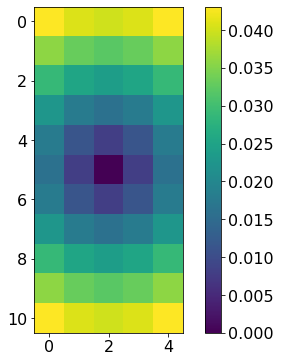

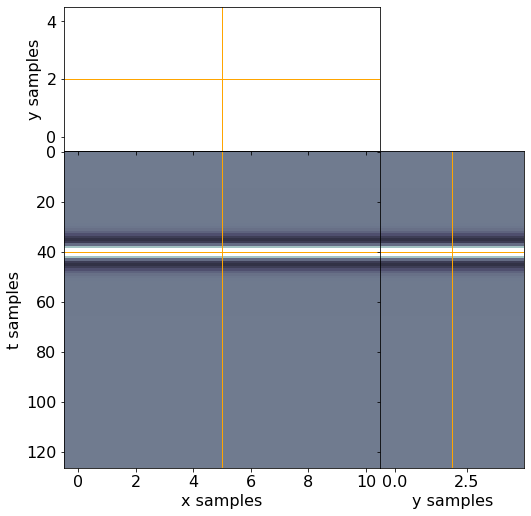

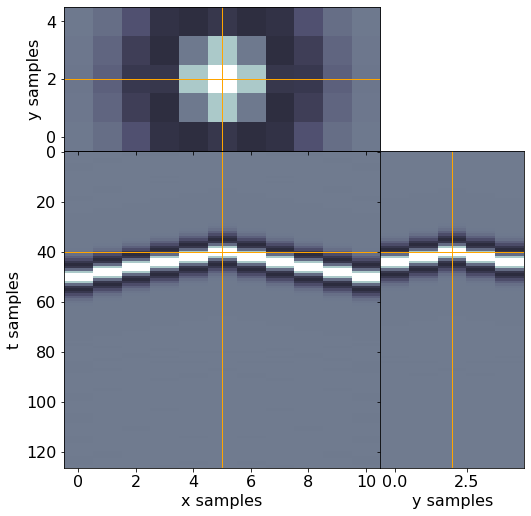

In [12]:
wav3d = np.outer(wav, np.ones(55)).reshape(nt, 11, 5).transpose(1, 0, 2)

x, y = np.meshgrid(np.arange(11)-5, np.arange(5)-2, indexing='ij')
shift = dt * np.sqrt(x**2+y**2) * 2
Op = Shift((11, nt, 5), shift, axis=-2, sampling=dt, real=True, dtype=np.float64)
wav3dshift = (Op * wav3d.ravel()).reshape(11, nt, 5)

plt.figure()
plt.imshow(shift)
plt.colorbar()
explode_volume(wav3d.transpose(1, 0, 2), t=40, x=5, y=2, interp='none')
explode_volume(wav3dshift.transpose(1, 0, 2), t=40, x=5, y=2, interp='none')